# Prediction of Heart Disease


The attributes are
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("../Datasets/heart.csv")

In [3]:
data.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [4]:
data.columns = ['Age', 'Sex', 'CPain', 'RestingBP','S.CHOL','F.B.Sugar','Rest.Elec','Max.HR','Ex.I.A','OldPeak','Slope','No.Vessels','Thal','Target']

In [5]:
data.head()

,Age,Sex,CPain,RestingBP,S.CHOL,F.B.Sugar,Rest.Elec,Max.HR,Ex.I.A,OldPeak,Slope,No.Vessels,Thal,Target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [6]:
data["Target"].where(~(data["Target"]>0), other=1, inplace=True)

In [7]:
data.head()

,Age,Sex,CPain,RestingBP,S.CHOL,F.B.Sugar,Rest.Elec,Max.HR,Ex.I.A,OldPeak,Slope,No.Vessels,Thal,Target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         302 non-null    float64
 1   Sex         302 non-null    float64
 2   CPain       302 non-null    float64
 3   RestingBP   302 non-null    float64
 4   S.CHOL      302 non-null    float64
 5   F.B.Sugar   302 non-null    float64
 6   Rest.Elec   302 non-null    float64
 7   Max.HR      302 non-null    float64
 8   Ex.I.A      302 non-null    float64
 9   OldPeak     302 non-null    float64
 10  Slope       302 non-null    float64
 11  No.Vessels  302 non-null    object 
 12  Thal        302 non-null    object 
 13  Target      302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [9]:
data.drop(data.index[data["No.Vessels"]=='?'],inplace=True)

In [10]:
data.drop(data.index[data["Thal"]=='?'],inplace=True)

In [11]:
data['No.Vessels'] = data['No.Vessels'].astype(float, errors = 'raise')
data['Thal'] = data['Thal'].astype(float, errors = 'raise')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         296 non-null    float64
 1   Sex         296 non-null    float64
 2   CPain       296 non-null    float64
 3   RestingBP   296 non-null    float64
 4   S.CHOL      296 non-null    float64
 5   F.B.Sugar   296 non-null    float64
 6   Rest.Elec   296 non-null    float64
 7   Max.HR      296 non-null    float64
 8   Ex.I.A      296 non-null    float64
 9   OldPeak     296 non-null    float64
 10  Slope       296 non-null    float64
 11  No.Vessels  296 non-null    float64
 12  Thal        296 non-null    float64
 13  Target      296 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.7 KB


<AxesSubplot:>

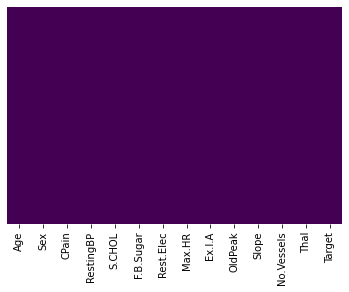

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#standardize variables
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(data.drop("Target",axis=1))

StandardScaler()

In [16]:
scaled_features = scaler.transform(data.drop('Target',axis=1))

In [17]:
data_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()

,Age,Sex,CPain,RestingBP,S.CHOL,F.B.Sugar,Rest.Elec,Max.HR,Ex.I.A,OldPeak,Slope,No.Vessels,Thal
0,1.381810,0.692820,0.872280,1.597628,0.742464,-0.406638,1.013652,-1.813215,1.432322,0.385480,0.656038,2.473994,-0.891149
1,1.381810,0.692820,0.872280,-0.656413,-0.353882,-0.406638,1.013652,-0.897846,1.432322,1.330603,0.656038,1.408052,1.173666
2,-1.938123,0.692820,-0.173043,-0.092903,0.050035,-0.406638,-1.000046,1.630318,-0.698167,2.103885,2.287865,-0.723832,-0.891149
3,-1.495465,-1.443376,-1.218366,-0.092903,-0.834736,-0.406638,1.013652,0.976483,-0.698167,0.299560,-0.975788,-0.723832,-0.891149
4,0.164501,0.692820,-1.218366,-0.656413,-0.219243,-0.406638,-1.000046,1.238017,-0.698167,-0.215962,-0.975788,-0.723832,-0.891149


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, data['Target'], test_size=0.25, random_state=42)

## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=28)

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=28)

In [32]:
knn_pred = knn.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [34]:
print(accuracy_score(y_test,knn_pred))

0.9594594594594594


Text(0, 0.5, 'Error Rate')

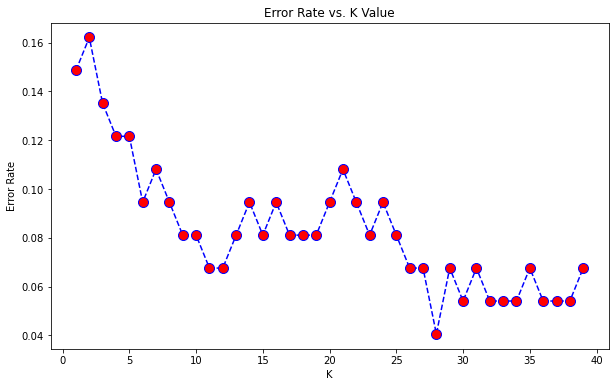

In [26]:
# TO FIND THE BEST VALUE OF K
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## RFC

In [35]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(data.drop("Target",axis=1), data['Target'], test_size=0.25, random_state=0)

In [36]:
rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(Y_test,rfc_pred))

0.8513513513513513


## SVM

In [37]:
from sklearn.svm import SVC

In [38]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)

In [39]:
print(accuracy_score(y_test,svm_pred))

0.8918918918918919


## HyperParamater Tuning

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [42]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.523 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.523 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.523 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [44]:
grid_pred=grid.predict(x_test)
print(accuracy_score(y_test,grid_pred))

0.9594594594594594


## Lets go with GridSearchCV

In [45]:
# saving our model
import pickle

In [49]:
pickle.dump(grid,open('../Saved Models/heart_model.sav','wb'))